In [1]:
#!unzip Images.zip

In [2]:
#!unzip Airplanes_Annotations.zip

In [3]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from ArabicOcr import arabicocr

In [4]:
path = "Images"

The general ideia of how the will it proccess 

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.9555: Production date:
[INFO] 1.0000: 14/01/2019
[INFO] 0.1251: |4/072019
[INFO] 0.6931: تارىخ انتاج
[INFO] 0.5685: date 
[INFO] 0.9999: 13/07/2020
[INFO] 0.2292: I3 V/T020 تاريح الانتهاء
[INFO] 0.7297: L0[
[INFO] 0.9147: رقم الحصه
[INFO] 0.5993: G0919 01506:27
[INFO] 0.9929: Origin
[INFO] 0.0894: لحلد
[INFO] 0.8819: المنشا
[INFO] 0.6850: Expiry
[INFO] 0.4682: Belgiur


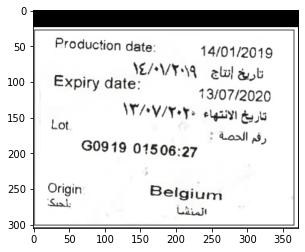

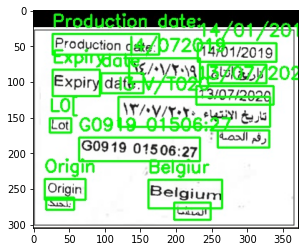

In [5]:
out_image='out.jpg'
for e,i in enumerate(os.listdir(path)):
    if e < 10:
        filename = i.split(".")[0]+".png"
        full_path_file = path+"/"+filename
        img = cv2.imread(os.path.join(path,filename))
        #df = pd.read_csv(os.path.join(annot,i))
        height, width, channels = img.shape
        plt.imshow(img)
        
        results=arabicocr.arabic_ocr(full_path_file,out_image)
        img_final = cv2.imread(os.path.join("",out_image))
        plt.figure()
        plt.imshow(img_final)
        break

In [6]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

The Ideia of what is algorithm of how is the algorithm is going to process the image

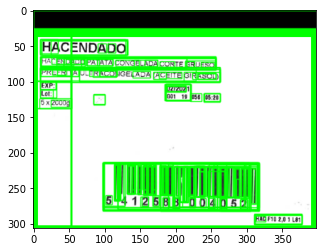

In [7]:
im = cv2.imread(os.path.join(path,"label6.png"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(imOut)
# plt.figure()
plt.imshow(imOut)

In [8]:
train_images=[]
train_labels=[]

In [9]:
def get_iou(bb1, bb2):
    
    assert bb1['x1'] <= bb1['x2']
    assert bb1['y1'] <= bb1['y2']
    assert bb2['x1'] <= bb2['x2']
    assert bb2['y1'] <= bb2['y2']
    

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [10]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
for e,i in enumerate(os.listdir(path)):
    try:
        if i.startswith("label"):
            filename = i.split(".")[0]+".png"
            
            full_path_file = path+"/"+filename
            image = cv2.imread(os.path.join(path,filename))
            height, width, channels = image.shape
            out_image='out.jpg'
            results=arabicocr.arabic_ocr(full_path_file,out_image)
            gtvalues=[]
            #for row in df.iterrows():
            for i in range(len(results)):
                #x1 = int(row[1][0].split(" ")[0])
                x1 =results[i][0][0][0]
                #y1 = int(row[1][0].split(" ")[1])
                y1 =results[i][0][0][1]
                #x2 = int(row[1][0].split(" ")[2])
                x2 =results[i][0][1][0]
                #y2 = int(row[1][0].split(" ")[3])
                y2 =results[i][0][1][1]
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            for e,result in enumerate(ssresults):
                if e < 200: 
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        timage = imout[y:y+h,x:x+w]
                        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                        train_images.append(resized)
                        if filename.endswith('wrong.png') and iou > 0.70:
                            train_labels.append(1)
                        elif iou < 0.30:
                            train_labels.append(0)


    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.2036: S4| 4M
[INFO] 0.5927: French Frler
[INFO] 0.9041: Stralght cut
[INFO] 0.1876: 9)9
[INFO] 0.1526: 4 0 2,5 1 8
[INFO] 0.0044: /80h ^'!?0 8 3?
[INFO] 0.1817: Parn4r LC
[INFO] 0.1732: FMCG Divlr on g0 Box !239=
[INFO] 0.0485: CL: Il1 MuscJl Sultan3te 0/ 0m5n
[INFO] 0.1035: Org n .
[INFO] 0.1568: 8a g -~
[INFO] 0.2124: لحثا
[INFO] 0.2543: المثا
[INFO] 0.0582: PIoUlclion 0ate
[INFO] 0.9844: 14/01/2019
[INFO] 0.1282:  4/09/2019
[INFO] 0.5522: نارن اندع
[INFO] 0.1511: 4x2 d384
[INFO] 0.9696: 13/01/2020
[INFO] 0.2101:  3 07 2020
[INFO] 0.6533: نارق الاسباء
[INFO] 0.0591: L 0' 6(9
[INFO] 0.4281: 01505;11
[INFO] 0.4575: 84_ F10 2,5
[INFO] 0.3137: |1?05[


Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.7186: Production date
[INFO] 0.7851: 14/01/2019
[INFO] 0.0719: )/09/20 9
[INFO] 0.9773: تاربخ انتاج
[INFO] 0.7918: Expiry date:
[INFO] 1.0000: 13/07/2020
[INFO] 0.2319:  3/V/T020 تاربخ الانتهاء
[INFO] 0.3317: Lot:
[INFO] 0.5521: رقم الحصة
[INFO] 0.9822: 30919 01512:23
[INFO] 0.9580: Origin
[INFO] 0.8541: Belgium
[INFO] 0.1999: لحك '
[INFO] 0.5727: المنسا


Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...


In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [ ]:
X_new.shape

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:
vggmodel = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
vggmodel.summary()

In [ ]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [ ]:
X= vggmodel.layers[-2].output

In [ ]:
predictions = Dense(2, activation="softmax")(X)

In [ ]:
model_final = Model(vggmodel.input,predictions)

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [ ]:
model_final.summary()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
 

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 6, epochs= 5, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["accuracy","Validation accuracy"])
plt.show()
plt.savefig('chart accuracy')


In [ ]:
X_test.shape

In [ ]:
im = X_test[7]
img = np.expand_dims(im, axis=0)
plt.imshow(im)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("label")
    plt.imshow(out)
else:
    print("not label")
    

Will only consider the images detected with 80% of accoracy 

In [ ]:
for e,i in enumerate(os.listdir(path)):
    if i=="label8.png":
        z=0
        total=0
        totalR=0
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        flag_label_true = 0
        for e,result in enumerate(ssresults):
            if e < 200:
                z += 1
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][1] > 0.85 :
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                    plt.figure()
                    plt.imshow(imout)
                    total+= out[0][1]
                    totalR+= out[0][0]
        print(total/z)
        print(totalR/z)
        if total/z > 0.90 and totalR/z < 0.1:
            plt.figure()
            plt.imshow(imout)

In [ ]:
im ="Images/label6.png"
out_image='out.jpg'
results=arabicocr.arabic_ocr(im,out_image)
print(results)

In [ ]:
results[0][0][1]

In [ ]:
words=[]
for i in range(len(results)):
        word=results[i][0][0][0]
        print(word)
        word=results[i][0][0][1]
        print(word)